In [1]:
!pip install d2l==1.0.0-beta0

  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


**--- Giới Thiệu ---**

Giờ hãy cùng bắt đầu nghiêm túc hơn bằng cách xem xét trường hợp đầu tiên: phân biệt mèo và chó dựa trên các bức ảnh. Điều này tưởng chừng đơn giản nhưng thực ra là một thách thức. Để bắt đầu, độ phức tạp của bài toán này có thể phụ thuộc vào độ phân giải của ảnh.

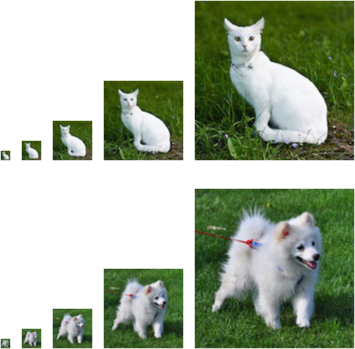

Con người phân biệt mèo và chó dễ dàng ở độ phân giải $160×160$ điểm ảnh, có chút thử thách hơn ở $40×40$ điểm ảnh, và gần như không thể ở $10×10$ điểm ảnh. Nói cách khác, khả năng phân biệt mèo và chó của chúng ta ở khoảng cách càng xa (đồng nghĩa với độ phân giải thấp) càng giống đoán mò. Xác suất trang bị cho ta một cách suy luận hình thức về mức độ chắc chắn. Nếu chúng ta hoàn toàn chắc chắn rằng bức ảnh mô tả một con mèo, ta có thể nói rằng xác suất nhãn tương ứng $y$ là “mèo”, ký hiệu là  $P(y=  “mèo” )$  equals $1$ . Nếu chúng ta không có manh mối nào để đoán rằng  $y=  “mèo”$ hoặc là  $y=  “chó”$, thì ta có thể nói rằng hai xác suất này có khả năng bằng nhau, biễu diễn bởi  $P(y=  “mèo” )=P(y=  “chó” )=0.5$ . Nếu ta khá tự tin, nhưng không thực sự chắc chắn bức ảnh mô tả một con mèo, ta có thể gán cho nó một xác suất  $0.5<P(y=  “mèo” )<1$ .

Giờ hãy xem xét trường hợp thứ hai: cho dữ liệu theo dõi khí tượng, chúng ta muốn dự đoán xác suất ngày mai trời sẽ mưa ở Đài Bắc. Nếu vào mùa hè, xác suất trời mưa có thể là  0.5 .

Trong cả hai trường hợp, chúng ta đều quan tâm tới một đại lượng nào đó và cùng không chắc chắn về giá trị đầu ra. Nhưng có một khác biệt quan trọng giữa hai trường hợp. Trong trường hợp đầu tiên, bức ảnh chỉ có thể là chó hoặc mèo, và chúng ta chỉ không biết là loài nào. Trong trường hợp thứ hai, đầu ra thực sự có thể là một sự kiện ngẫu nhiên, nếu bạn tin vào những thứ như vậy (và hầu hết các nhà vật lý tin vậy). Như vậy xác suất là một ngôn ngữ linh hoạt để suy đoán về mức độ chắc chắn của chúng ta, và nó có thể được áp dụng hiệu quả trong vô vàn ngữ cảnh khác nhau.

# 2.6.1. Lý thuyết Xác suất cơ bản

Giả sử, ta tung xúc xắc và muốn biết cơ hội để thấy mặt số  $1$  so với các mặt khác là bao nhiêu? Nếu chiếc xúc xắc có chất liệu đồng nhất, thì cả $6$  mặt  ${1,…,6}$ đều có khả năng xuất hiện như nhau, nên ta sẽ thấy mặt  1  xuất hiện một lần trong mỗi sáu lần tung xúc xắc như trên. Ta có thể nói rằng mặt  $1$  xuất hiện với xác suất là  ${1}/{6}$ .

Với một chiếc xúc xắc thật, ta có thể không biết được tỷ lệ này và cần kiểm tra liệu xúc xắc có bị hư hỏng gì không. Cách duy nhất để kiểm tra là tung thật nhiều lần rồi ghi lại kết quả. Mỗi lần tung, ta quan sát thấy một số trong  ${1,…,6}$ xuất hiện. Với kết quả này, ta muốn kiểm chứng xác suất xuất hiện của từng mặt số.

Cách tính trực quan nhất là lấy số lần xuất hiện của mỗi mặt số chia cho tổng số lần tung. Cách này cho ta một ước lượng của xác suất ứng với một sự kiện cho trước. Luật số lớn cho ta biết rằng số lần tung xúc xắc càng tăng thì ước lượng này càng gần hơn với xác xuất thực. Trước khi giải thích chi tiết hơn, hãy cùng lập trình thí nghiệm này.

In [2]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
fair_probs = torch.tensor([1/6,1/6,1/6,1/6,1/6,1/6])
Multinomial(1000, fair_probs).sample()

tensor([169., 157., 175., 171., 177., 151.])

In [10]:
Multinomial(1000, fair_probs).sample() / 1000

tensor([0.1490, 0.1610, 0.1990, 0.1450, 0.1630, 0.1830])

In [11]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.1654, 0.1725, 0.1611, 0.1680, 0.1705, 0.1625])

Chúng ta cũng có thể giả sử làm  3  thí nghiệm, trong đó mỗi thí nghiệm cùng lúc lấy ra  10000  mẫu.

In [16]:
counts = Multinomial(10000, fair_probs).sample((3,))
counts/10000

tensor([[0.1655, 0.1703, 0.1665, 0.1671, 0.1663, 0.1643],
        [0.1665, 0.1600, 0.1674, 0.1685, 0.1630, 0.1746],
        [0.1638, 0.1662, 0.1627, 0.1641, 0.1705, 0.1727]])

Do dữ liệu được sinh bởi một con xúc xắc đều, ta biết mỗi đầu ra đều có xác suất thực bằng  $1/6$ , cỡ  $0.167$ , do đó kết quả ước lượng bên trên trông khá ổn.

Chúng ta cũng có thể minh họa những xác suất này hội tụ tới xác suất thực như thế nào. Hãy cũng làm  500  thí nghiệm trong đó mỗi thí nghiệm lấy ra  10  mẫu.

tensor([[  2.,   1.,   0.,   4.,   0.,   3.],
        [  2.,   3.,   1.,   7.,   2.,   5.],
        [  2.,   4.,   3.,  10.,   3.,   8.],
        ...,
        [821., 811., 853., 818., 831., 846.],
        [824., 812., 854., 819., 832., 849.],
        [826., 812., 856., 820., 834., 852.]])
[[0.2        0.1        0.         0.4        0.         0.3       ]
 [0.1        0.15       0.05       0.35       0.1        0.25      ]
 [0.06666667 0.13333334 0.1        0.33333334 0.1        0.26666668]
 ...
 [0.16485944 0.16285141 0.17128514 0.16425703 0.16686746 0.16987951]
 [0.16513026 0.16272545 0.17114228 0.16412826 0.16673347 0.17014028]
 [0.1652     0.1624     0.1712     0.164      0.1668     0.1704    ]]


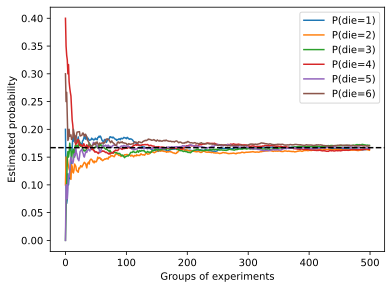

In [20]:
counts = Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
print(estimates)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i],
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

Mỗi đường cong liền tương ứng với một trong sáu giá trị của xúc xắc và chỉ ra xác suất ước lượng của sự kiện xúc xắc ra mặt tương ứng sau mỗi thí nghiệm. Đường đứt đoạn màu đen tương ứng với xác suất thực. Khi ta lấy thêm dữ liệu bằng cách thực hiện thêm các thí nghiệm, thì  6  đường cong liền sẽ hội tụ tiến tới xác suất thực. 

## 2.6.1.1. Các tiên đền của Lý thuyết Xác suất

Khi thực hiện tung một con xúc xắc, chúng ta gọi tập hợp $S={1,2,3,4,5,6}$ là *không gian mẫu* hoặc *không gian kết quả*, trong đó mỗi phần tử là một kết quả. Một sự kiện là một tập hợp các kết quả của không gian mẫu. Ví dụ, “tung được một số 5” $({5})$ và “tung được một số lẻ” $({1,3,5})$ đều là những sự kiện hợp lệ khi tung một con xúc xắc. Chú ý rằng nếu kết quả của một phép tung ngẫu nhiên nằm trong sự kiện A, sự kiện A đã xảy ra. Như vậy, nếu mặt 3 chấm ngửa lên sau khi xúc xắc được tung, chúng ta nói sự kiện “tung được một số lẻ” đã xảy ra bởi vì  3∈{1,3,5}

Một cách chính thống hơn, xác suất có thể được xem là một hàm số ánh xạ một tập hợp các sự kiện tới một số thực. Xác suất của sự kiện  $A$  trong không gian mẫu  $S$ , được kí hiệu là $P(A)$ , phải thoả mãn những tính chất sau:



*   Với mọi sự kiện  $A$ , xác suất của nó là không âm, tức là:  $P(A)≥0$ ;
*   Xác suất của toàn không gian mẫu luôn bằng  $1$ , tức:  $P(S)=1$ ;
*   Đối với mọi dãy sự kiện có thể đếm được  $A_1,A_2,…$  xung khắc lẫn nhau $( A_i∩A_j=∅$  với mọi  $i≠j )$, xác suất có ít nhất một sự kiện xảy ra sẽ là tổng của những giá trị xác suất riêng lẻ, hay:
$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$.

Đây cũng là những tiên đề của lý thuyết xác suất, được đề xuất bởi Kolmogorov năm 1933. Nhờ vào hệ thống tiên đề này, ta có thể tránh được những tranh luận chủ quan về sự ngẫu nhiên; và ta có thể có được những suy luận chặt chẽ sử dụng ngôn ngữ toán học. Ví dụ, cho sự kiện  $A_1$  là toàn bộ không gian mẫu và  $A_i=∅$  với mọi  $i>1$ , chúng ta có thể chứng minh rằng  $P(∅)=0$ , nghĩa là xác suất của sự kiện không thể xảy ra bằng  $0$ .




## 2.6.1.2 Biến ngẫu nhiên

Trong thí nghiệm tung xúc xắc ngẫu nhiên, chúng ta đã giới thiệu khái niệm của một biến ngẫu nhiên. Một biến ngẫu nhiên có thể dùng để biểu diễn cho hầu như bất kỳ đại lượng nào và giá trị của nó không cố định. Nó có thể nhận một giá trị trong tập các giá trị khả dĩ từ một thí nghiệm ngẫu nhiên. Hãy xét một biến ngẫu nhiên  X  có thể nhận một trong những giá trị từ tập không gian mẫu  $S={1,2,3,4,5,6}$  của thí nghiêm tung xúc xắc. Chúng ta có thể biểu diễn sự kiện “trông thấy mặt  $5$ ” là  ${X=5}$  hoặc  $X=5$ , và xác suất của nó là  $P({X=5})$  hoặc  $P(X=5)$ . Khi viết  $P(X=a)$ , chúng ta đã phân biệt giữa biến ngẫu nhiên  $X$  và các giá trị (ví dụ như  $a$ ) mà  $X$  có thể nhận. Tuy nhiên, ký hiệu như vậy khá là rườm rà. Để đơn giản hóa ký hiệu, một mặt, chúng ta có thể chỉ cần dùng  $P(X)$  để biểu diễn phân phối của biến ngẫu nhiên  $X$ : phân phối này cho chúng ta biết xác xuất mà  $X$  có thể nhận cho bất kỳ giá trị nào. Mặt khác, chúng ta có thể đơn thuần viết  $P(a)$  để biểu diễn xác suất mà một biến ngẫu nhiên nhận giá trị  $a$ . Bởi vì một sự kiện trong lý thuyết xác suất là một tập các kết quả từ không gian mẫu, chúng ta có thể xác định rõ một khoảng các giá trị mà một biến ngẫu nhiên có thể nhận. Ví dụ,  $P(1≤X≤3)$  diễn tả xác suất của sự kiện  ${1≤X≤3}$ , nghĩa là  ${X=1,2,hoặc,3}$ . Tương tự,  $P(1≤X≤3)$  biểu diễn xác suất mà biến ngẫu nhiên  $X$  có thể nhận giá trị trong tập  ${1,2,3}$ .



# 2.6.2. Làm việc với nhiều biến ngẫu nhiên

Chúng ta sẽ thường xuyên phải làm việc với nhiều hơn một biến ngẫu nhiên cùng lúc. Ví dụ, chúng ta có thể muốn mô hình hóa mối quan hệ giữa các loại bệnh và các triệu chứng bệnh. Cho một loại bệnh và một triệu chứng bệnh, giả sử “cảm cúm” và “ho”, chúng có thể xuất hiện hoặc không trên một bệnh nhân với xác suất nào đó. Mặc dù chúng ta hy vọng xác suất cả hai xảy ra gần bằng không, ta có thể vẫn muốn ước lượng các xác suất này và mối quan hệ giữa chúng để có thể thực hiện các biện pháp chăm sóc y tế tốt hơn.

Xét một ví dụ phức tạp hơn: các bức ảnh chứa hàng triệu điểm ảnh, tương ứng với hàng triệu biến ngẫu nhiên. Và trong nhiều trường hợp các bức ảnh sẽ được gán một nhãn chứa tên các vật xuất hiện trong ảnh. Chúng ta cũng có thể xem nhãn này như một biến ngẫu nhiên. Thậm chí, ta còn có thể xem tất cả các siêu dữ liệu như địa điểm, thời gian, khẩu độ, tiêu cự, ISO, khoảng lấy nét và loại máy ảnh, là các biến ngẫu nhiên. Tất cả các những biến ngẫu nhiên này xảy ra đồng thời. Khi làm việc với nhiều biến ngẫu nhiên, có một số đại lượng đáng được quan tâm.



## 2.6.2.1. Xác suất đồng thời

Đầu tiên là xác suất đồng thời  $P(A=a,B=b)$ . Cho hai biến  $a$  và  $b$  bất kỳ, xác suất đồng thời cho ta biết xác suất để cả  $A=a$  và  $B=b$  đều xảy ra. Ta có thể thấy rằng với mọi giá trị  $a$  và  $b$ ,  $P(A=a,B=b)≤P(A=a)$ . Bởi để  $A=a$  và  $B=b$  xảy ra thì  $A=a$  phải xảy ra và  $B=b$  cũng phải xảy ra (và ngược lại). Do đó, khả năng  $A=a$  và  $B=b$  xảy ra đồng thời không thể lớn hơn khả năng  $A=a$  hoặc  $B=b$  xảy ra một cách độc lập được.

## 2.6.2.2 Xác suất có điều kiện

Điều này giúp ta thu được một tỉ lệ thú vị:  $0≤\frac{P(A=a, B=b)}{P(A=a)} \leq 1$ . Chúng ta gọi tỉ lệ này là xác suất có điều kiện và ký hiệu là  $P(B=b∣A=a)$ : xác suất để  $B=b$ , với điều kiện  $A=a$  đã xảy ra.

## 2.6.2.3. Định lý Bayes

Sử dụng định nghĩa của xác suất có điều kiện, chúng ta có thể thu được một trong những phương trình nổi tiếng và hữu dụng nhất trong thống kê: định lý Bayes. Cụ thể như sau: Theo định nghĩa chúng ta có quy tắc nhân  $P(A,B)=P(B∣A)P(A)$ . Tương tự, ta cũng có  $P(A,B)=P(A∣B)P(B)$ . Giả sử  $P(B)>0$ . Kết hợp các điều kiện trên ta có:

$$P(A \mid B) = \frac{P(B\mid A) P(A)}{P(B)}.$$

Lưu ý rằng ở đây chúng ta sử dụng ký hiệu ngắn gọn hơn, với  $P(A,B)$  là xác suất đồng thời và  $P(A∣B)$  là xác suất có điều kiện. Các phân phối này có thể được tính tại các giá trị cụ thể  $A=a,B=b$ .

## 2.6.2.4. Phép biên hóa

Định lý Bayes rất hữu ích nếu chúng ta muốn suy luận một điều gì đó từ một điều khác, như là nguyên nhân và kết quả, nhưng ta chỉ biết các đặc tính theo chiều ngược lại, như ta sẽ thấy trong phần sau của chương này. Chúng ta cần làm một thao tác quan trọng để đạt được điều này, đó là phép biên hóa. Có thể hiểu là việc xác định  $P(B)$  từ  $P(A,B)$ . Chúng ta có thể tính được xác suất của B bằng tổng xác suất kết hợp của A và B tại mọi giá trị có thể của A:

$$P(B) = \sum_A P(A, B)$$

Công thức này cũng được biết đến với tên gọi quy tắc tổng. Xác suất hay phân phối thu được từ thao tác biên hóa được gọi là xác suất biên hoặc phân phối biên.

## 2.6.2.5 Tính độc lập

Một tính chất hữu ích khác cần kiểm tra là tính phụ thuộc và tính độc lập. Hai biến ngẫu nhiên  $A$  và  $B$  độc lập nghĩa là việc một sự kiện của  $A$  xảy ra không tiết lộ bất kỳ thông tin nào về việc xảy ra một sự kiện của  $B$ . Trong trường hợp này  $P(B∣A)=P(B)$ . Các nhà thống kê thường biểu diễn điều này bằng ký hiệu  $A⊥B$ . Từ định lý Bayes, ta có  $P(A∣B)=P(A)$ . Trong tất cả các trường hợp khác, chúng ta gọi  $A$  và  $B$  là hai biến phụ thuộc. Ví dụ, hai lần đổ liên tiếp của một con xúc xắc là độc lập. Ngược lại, vị trí của công tắc đèn và độ sáng trong phòng là không độc lập (tuy nhiên chúng không hoàn toàn xác định, vì bóng đèn luôn có thể bị hỏng, mất điện hoặc công tắc bị hỏng).

Vì  $P(A∣B)=\frac{P(A,B)}{P(B)}=P(A)$  tương đương với  $P(A,B)=P(A)P(B)$ , hai biến ngẫu nhiên là độc lập khi và chỉ khi phân phối đồng thời của chúng là tích các phân phối riêng lẻ của chúng. Tương tự, cho một biến ngẫu nhiên  C  khác, hai biến ngẫu nhiên  A  và  B  là độc lập có điều kiện khi và chỉ khi  $P(A,B∣C)=P(A∣C)P(B∣C)$ . Điều này được ký hiệu là  $A⊥B∣C$.

## 2.6.2.6. Ứng dụng

Hãy thử nghiệm các kiến thức chúng ta vừa học. Giả sử rằng một bác sĩ phụ trách xét nghiệm AIDS cho một bệnh nhân. Việc xét nghiệm này khá chính xác và nó chỉ thất bại với xác suất  1% , khi nó cho kết quả dương tính dù bệnh nhân khỏe mạnh. Hơn nữa, nó không bao giờ thất bại trong việc phát hiện HIV nếu bệnh nhân thực sự bị nhiễm bệnh. Ta sử dụng  D1  để biểu diễn kết quả chẩn đoán ( 1  nếu dương tính và  0  nếu âm tính) và  H  để biểu thị tình trạng nhiễm HIV ( 1  nếu dương tính và  0  nếu âm tính). Bảng dưới liệt kê xác suất có điều kiện đó.

| Xác suất có điều kiện | $H=1$ | $H=0$ |
|:------------------------|------:|------:|
| $P(D_1 = 1 \mid H)$        |     1 |  0.01 |
| $P(D_1 = 0 \mid H)$        |     0 |  0.99 |

Lưu ý rằng tổng của từng cột đều bằng  1  (nhưng tổng từng hàng thì không), vì xác suất có điều kiện cần có tổng bằng  1 , giống như xác suất. Hãy cùng tìm xác suất bệnh nhân bị AIDS nếu xét nghiệm trả về kết quả dương tính, tức  $P(H=1∣D1=1)$ . Rõ ràng điều này sẽ phụ thuộc vào mức độ phổ biến của bệnh, bởi vì nó ảnh hưởng đến số lượng dương tính giả. Giả sử rằng dân số khá khỏe mạnh, ví dụ:  $P(H=1)=0.0015$ . Để áp dụng Định lý Bayes, chúng ta cần áp dụng phép biên hóa và quy tắc nhân để xác định

$$\begin{aligned}
P(D_1 = 1)
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$

Do đó, ta có:

$$P(H = 1 \mid D_1 = 1) = \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} = 0.1306.$$

Nói cách khác, chỉ có 13,06% khả năng bệnh nhân thực sự mắc bệnh AIDS, dù ta dùng một bài kiểm tra rất chính xác. Như ta có thể thấy, xác suất có thể trở nên khá phản trực giác.

Một bệnh nhân phải làm gì nếu nhận được tin dữ như vậy? Nhiều khả năng họ sẽ yêu cầu bác sĩ thực hiện một xét nghiệm khác để làm rõ sự việc. Bài kiểm tra thứ hai có những đặc điểm khác và không tốt bằng bài thứ nhất, như ta có thể thấy trong Bảng dưới đây.

| Xác suất có điều kiện | $H=1$ | $H=0$ |
|:------------------------|------:|------:|
| $P(D_2 = 1 \mid H)$          |  0.98 |  0.03 |
| $P(D_2 = 0 \mid H)$          |  0.02 |  0.97 |

Không may thay, bài kiểm tra thứ hai cũng có kết quả dương tính. Hãy cùng tính các xác suất cần thiết để sử dụng định lý Bayes bằng cách giả định tính độc lập có điều kiện:

$$\begin{aligned}
P(D_1 = 1, D_2 = 1 \mid H = 0)
& = P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)
=& 0.0003, \\
P(D_1 = 1, D_2 = 1 \mid H = 1)
& = P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)
=& 0.98.
\end{aligned}
$$

Bây giờ chúng ta có thể áp dụng phép biên hóa và quy tắc nhân xác suất:

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1)\\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

Cuối cùng, xác suất bệnh nhân mắc bệnh AIDS qua hai lần dương tính là

$$P(H = 1 \mid D_1 = 1, D_2 = 1)
= \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)}
= 0.8307.$$

Cụ thể hơn, thử nghiệm thứ hai mang lại độ tin cậy cao hơn rằng không phải mọi chuyện đều ổn. Mặc dù bài kiểm tra thứ hai kém chính xác hơn bài đầu, nó vẫn cải thiện đáng kể dự đoán.

# 2.6.3. Kỳ vọng và Phương sai

Để tóm tắt những đặc tính then chốt của các phân phối xác suất, chúng ta cần một vài phép đo. *Kỳ vọng (hay trung bình)* của một biến ngẫu nhiên  X , được ký hiệu là
$$E[X] = \sum_{x} x P(X = x).$$

Khi giá trị đầu vào của phương trình  $f(x)$  là một biến ngẫu nhiên nhiên cho trước theo phân phối  $P$  với các giá trị  $x$  khác nhau, kỳ vọng của  $f(x)$  sẽ được tính theo phương trình:

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x) \text{ and } E_{x \sim P}[f(x)] = \int f(x) p(x) \;dx$$

Trong nhiều trường hợp, chúng ta muốn đo độ lệch của biến ngẫu nhiên  X  so với kỳ vọng của nó. Đại lượng này có thể được đo bằng phương sai

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] = E[X^2] - E[X]^2.$$

Nếu lấy căn bậc hai của kết quả ta sẽ được độ lệch chuẩn. Phương sai của một hàm của một biến ngẫu nhiên đo độ lệch của hàm số đó từ kỳ vọng của nó khi các giá trị  x  khác nhau được lấy mẫu từ phân phối của biến ngẫu nhiên đó:

$$\mathrm{Var}_{x \sim P}[f(x)] = E_{x \sim P}[f^2(x)] - E_{x \sim P}[f(x)]^2.$$


# 2.6.4. Tóm tắt


*   Các biến ngẫu nhiên có thể được phân tích bằng các phương pháp như phân phối đồng thời (joint distribution), phân phối có điều kiện (conditional distribution), định lý Bayes, phép biên hóa (marginalization) và giả định độc lập (independence assumptions).
*   Kỳ vọng và phương sai là các phép đo hữu ích để tóm tắt các đặc điểm chính của phân phối xác suất.



# 2.6.5. Bài tập
